In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

/Users/miaoyu/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/miaoyu/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/miaoyu/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/

In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

In [4]:
tf.__version__

'1.13.2'

In [5]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

In [6]:
def drawImage(img):
    first_image = np.array(img, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

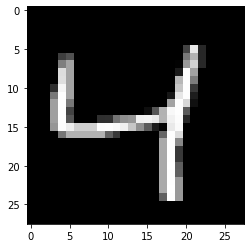

In [7]:
drawImage(x_train[2])

In [8]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [10]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2672 - acc: 0.9216
Epoch 2/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1075 - acc: 0.9671
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0728 - acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0535 - acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0414 - acc: 0.9865


In [12]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0868 - acc: 0.9740

Test accuracy: 0.974


In [13]:
def read_image(path):
    processed_image = cv2.resize(path, dsize=(28, 28))
    processed_image = np.resize(processed_image, new_shape=(1, 784))
    processed_image = processed_image/255.0
    return path, processed_image

In [14]:

def read_data(path):
#   img = base64.b64decode(msg.payload)
  image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  processed_image = cv2.resize(image, dsize=(28,28))
  processed_image = np.resize(processed_image, new_shape=(1, 784))
  processed_image = processed_image/255.0
  return processed_image

In [15]:
img = read_data("./1.png")
print(img.shape)
predictions = model.predict([[img]]) # Make prediction
print(np.argmax(predictions[0])) # Print out the number

(1, 784)
0
